In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("C:/Users/PC/Downloads/Finance Tracker 3.0 Example.xlsx")
df['Transac_Date'] = pd.to_datetime(df['Transac_Date'])


In [30]:
df

,User,Transac_Name,Transac_Type,Transac_Date,Transac_PM,Transac_Value,Transac_Date_M_Y
0,John,Movie Theater,Entertainment,2023-11-03,Cash,32.22,2023-11-01
1,David,Car Maintenance,Transportation,2023-11-03,Cheque,180.68,2023-11-01
2,Michael,Car Maintenance,Transportation,2023-11-05,Cheque,20.51,2023-11-01
3,Sarah,CVS Pharmacy,Medical,2023-11-05,Cheque,306.76,2023-11-01
4,Michael,Home Insurance,Housing/Utilities,2023-11-08,Cheque,1599.78,2023-11-01
...,...,...,...,...,...,...,...
495,Emma,Monthly Bus Pass,Transportation,2024-10-26,Cash,20.42,2024-10-01
496,Emma,Home Insurance,Housing/Utilities,2024-10-26,Cheque,1353.91,2024-10-01
497,Michael,Car Maintenance,Transportation,2024-10-30,Credit,77.00,2024-10-01
498,John,Target Essentials,Groceries,2024-11-01,Credit,134.00,2024-11-01


In [7]:
sns.set_style('whitegrid')
sns.set_palette("husl")

In [8]:
type_count = df["Transac_Type"].value_counts()
type_count.sort_values(inplace=True)  

Text(0.5, 0, 'Dollars')

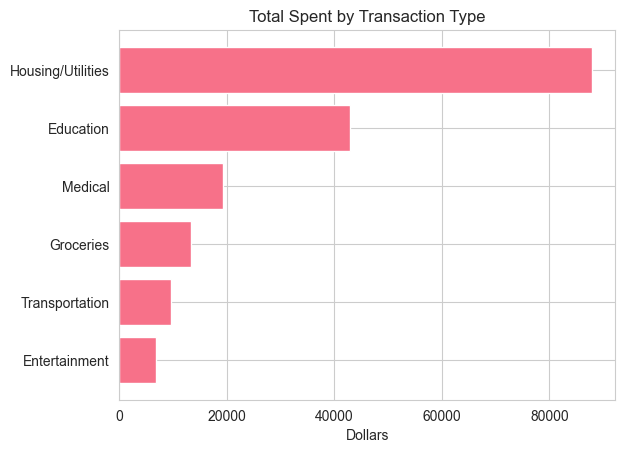

In [9]:
type_sum = df.groupby(by="Transac_Type")["Transac_Value"].sum().sort_values()
plt.barh(type_sum.index,type_sum)
plt.title("Total Spent by Transaction Type")
plt.xlabel("Dollars")

C:\Users\PC\AppData\Local\Temp\ipykernel_2324\4141578538.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.Grouper(key='Transac_Date', freq='M'),


<Figure size 1500x800 with 0 Axes>

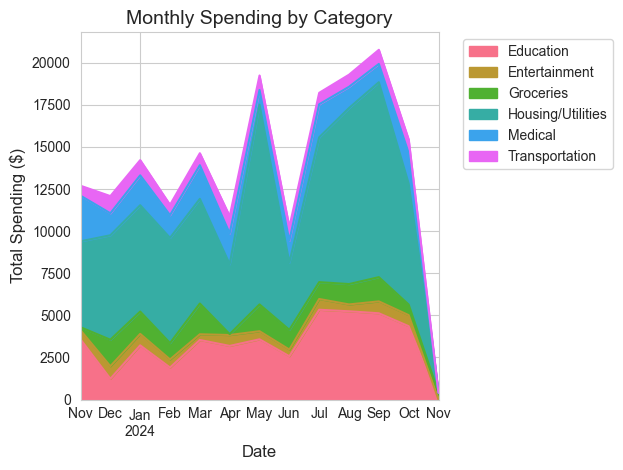

In [34]:
plt.figure(figsize=(15, 8))
monthly_by_category = df.pivot_table(
    index=pd.Grouper(key='Transac_Date', freq='M'),
    columns='Transac_Type',
    values='Transac_Value',
    aggfunc='sum'
).fillna(0)

monthly_by_category.plot(kind='area', stacked=True)
plt.title('Monthly Spending by Category', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Spending ($)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_28012\1279181167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='User', y='Transac_Value', palette='rocket')


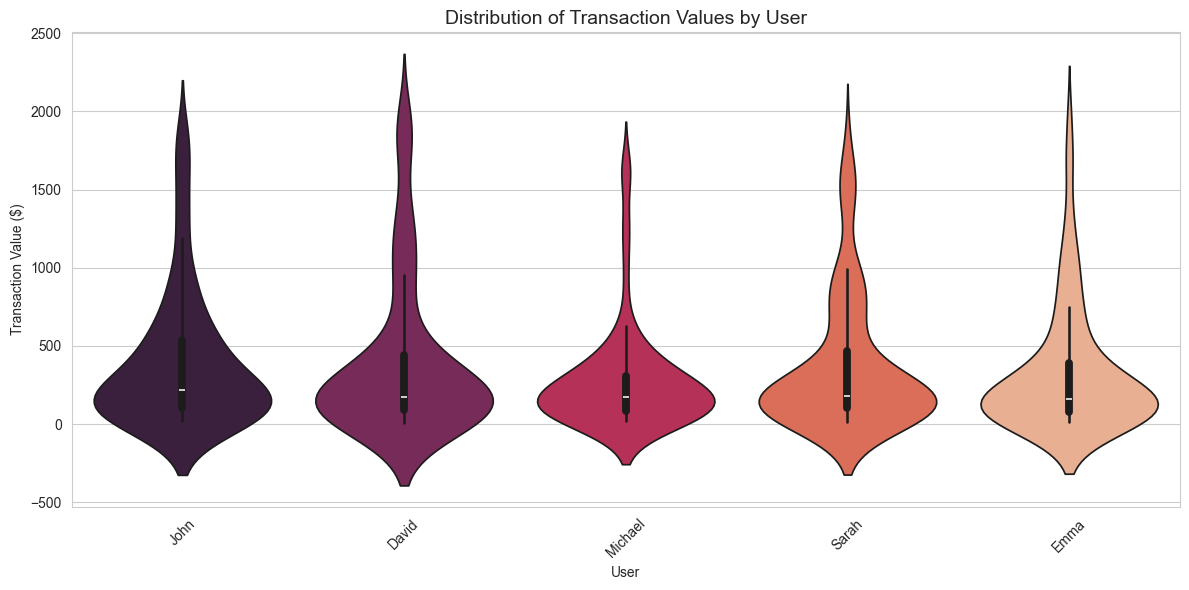

In [24]:
# 2. User spending patterns with violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='User', y='Transac_Value', palette='rocket')
plt.title('Distribution of Transaction Values by User', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Transaction Value ($)')
plt.tight_layout()
plt.show()

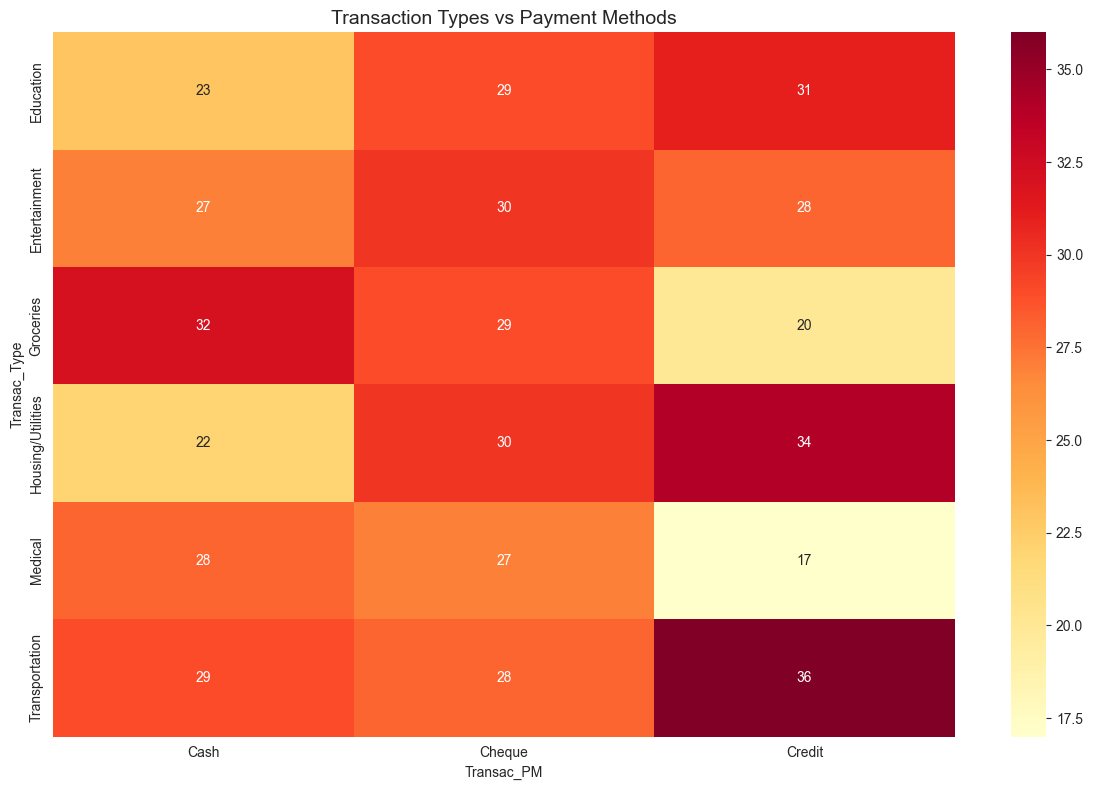

In [25]:
# 3. Heatmap of transaction types vs payment methods
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(df['Transac_Type'], df['Transac_PM'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Transaction Types vs Payment Methods', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_28012\3304029433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Transac_Type', y='Transac_Value', palette='Set3')


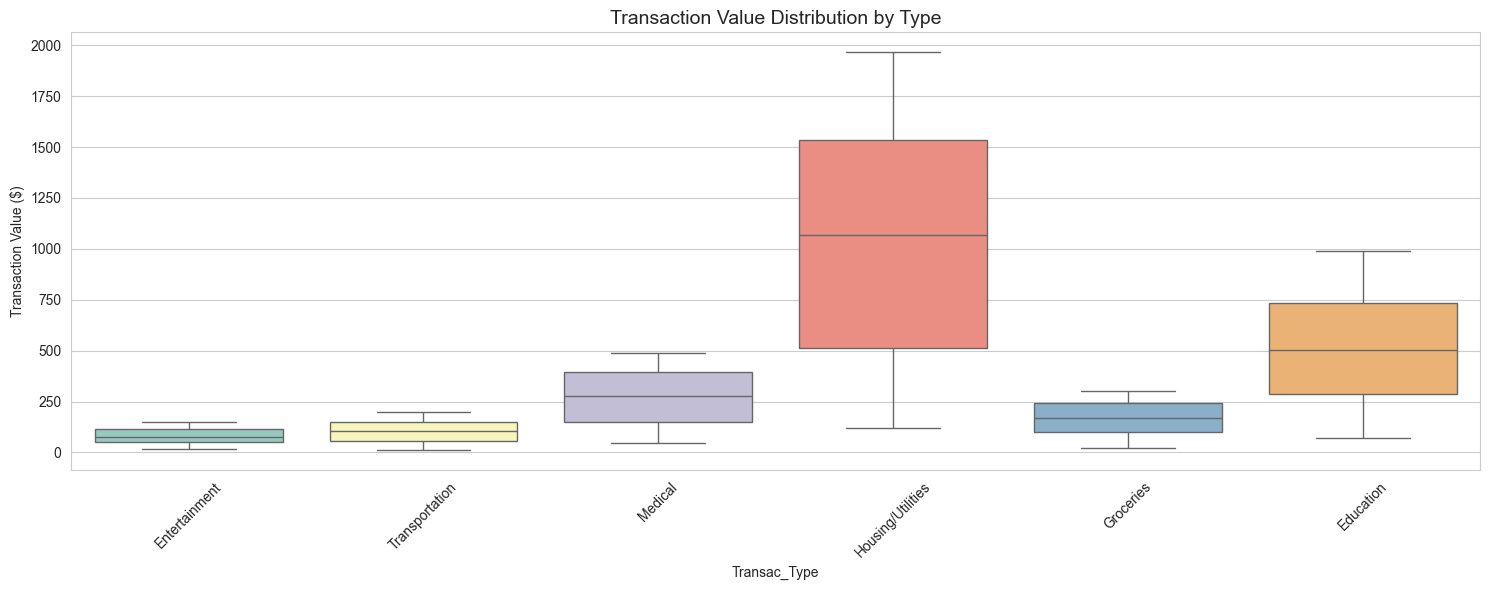

In [26]:
# 4. Box plot of transaction values by type
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Transac_Type', y='Transac_Value', palette='Set3')
plt.title('Transaction Value Distribution by Type', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Transaction Value ($)')
plt.tight_layout()
plt.show()
